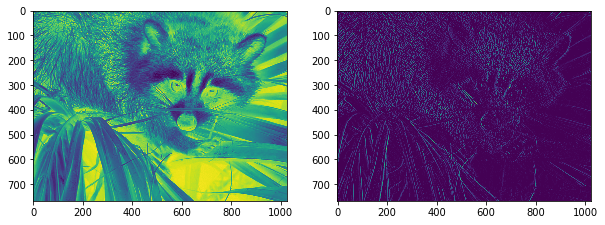

In [65]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage
import scipy.misc

# Edge Detection Filter(경계선 검출)
img = 255 - sp.misc.face(gray=True).astype(float) # 색 반전(255에서 빼니까)
k = np.zeros((2,2))
k[:, 0] = 1; k[:, 1] = -1

# convolve : 이미지에서 필터, 정보통신 무선신호 복원
img2 = np.maximum(0, sp.ndimage.filters.convolve(img, k))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show()

2 427 640 3


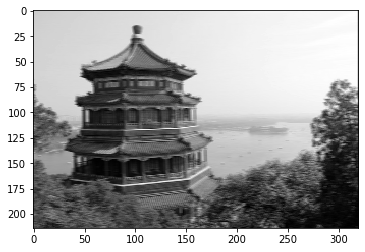

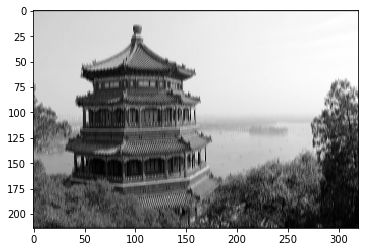

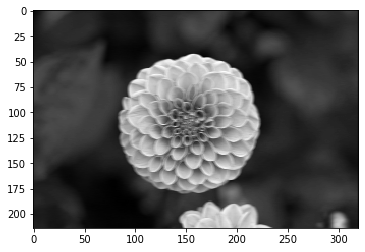

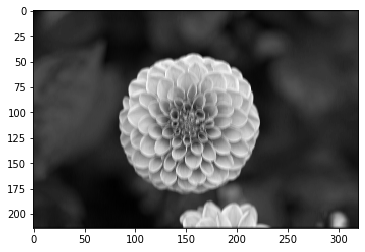

(2, 214, 320, 2)


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf

# 이미지 정규화 - 255로 나눈다.
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

# 사진이 2장이라 차원 하나가 더 증가(4차원)(1, height, width, channels)
# 사진이 1장인 경우 3차원(height, width, channels)
dataset = np.array([china, flower], dtype=np.float32)

# 장수, 높이, 너비, 컬러수(RGB)
batch_size, height, width, channels = dataset.shape # 2(장수) 427(행:높이) 640(열:너비) 3(컬러수RGB)
print(batch_size, height, width, channels)

filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
# filters
# 0 0
# 0 0
# 0 0

filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

# 주입변수(427(행:높이) 640(열:너비) 3(컬러수RGB))
X = tf.placeholder(tf.float32, shape=(None, height, width, channels)) # 장수는 알수없음(나머지는 정해짐)

# image format 결정
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")
# 원래 크기 : 427 x 640
# padding="SAME", strides=[1,2,2,1] 또는 strides=[2,2] : 214 x 320(->213.5=214) (->결과이미지가 반으로 줄어듦)
# padding="VALID" : 421 x 634, 7x7

# max_pool : convolution으로 나온 결과를 크기를 줄여준다. 2x2를 1로 줄여준다.
max_pool = tf.nn.max_pool(convolution, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
# strides=[1,1,1,1] 일 경우, 사이즈는 줄지않고 pooling만 진행

# graph 정의(node + edge)
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X:dataset})

plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()
plt.imshow(output[0, :, :, 0], cmap="gray")
plt.show()
plt.imshow(output[1, :, :, 1], cmap="gray")
plt.show()
plt.imshow(output[1, :, :, 0], cmap="gray")
plt.show()
type(output)
print(output.shape)
# 필터가 2개
# stride가 

TypeError: Invalid shape (107, 160, 2) for image data

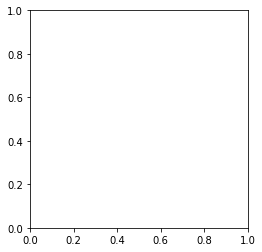

In [67]:
# max pooling 된 결과를 이미지 출력하시요.
# conv2d - 채널 1개로 생성
# pooling - 채널을 그대로
max_pool = tf.nn.max_pool(convolution, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X:dataset})
    
plt.imshow(output[0].astype(np.uint8)) # unsigned int(양수만 존재) ex)컬러값
plt.show()

In [14]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off") # 축 생략
    plt.show()
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation="nearest")
    plt.axis("off")
    plt.show()

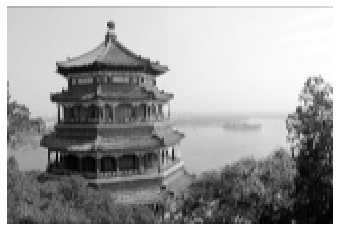

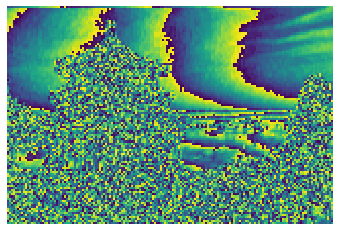

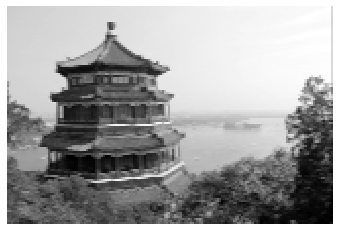

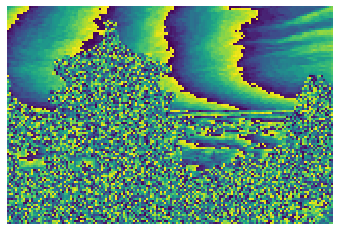

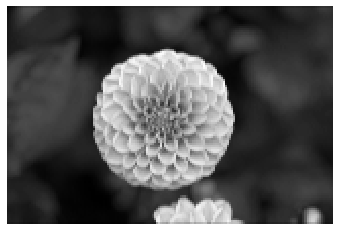

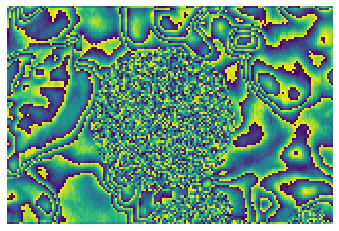

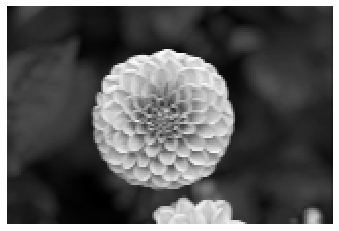

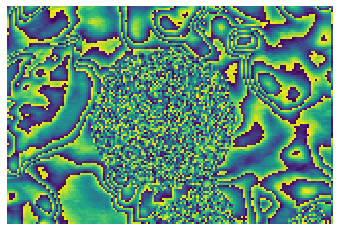

In [16]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index, :, :, feature_map_index])
        plot_color_image(output[image_index, :, :, feature_map_index])

#plot_image(output[0, :, :, 1])
#plot_image(output[0, :, :, 0])
#plot_image(output[1, :, :, 1])
#plot_image(output[1, :, :, 0])
#
#plot_color_image(output[0, :, :, 1])
#plot_color_image(output[0, :, :, 0])
#plot_color_image(output[1, :, :, 1])
#plot_color_image(output[1, :, :, 0])

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


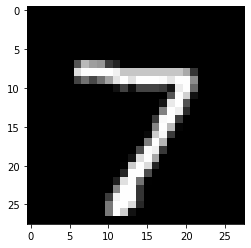

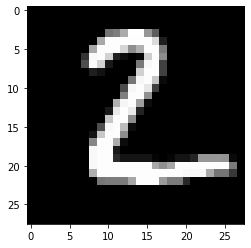

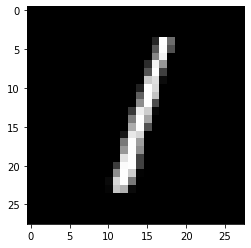

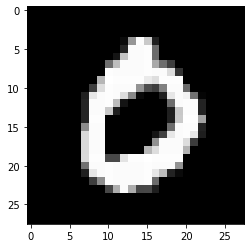

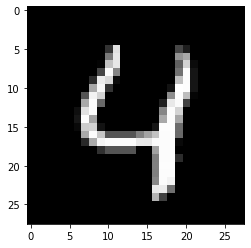

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as p
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
first_image = mnist.test.images[0:5] #dtype=float32
#first_image = np.array(first_image, dtype="float") 

# 이미지 5장 출력
for i in range(5):
    pixels = first_image[i].reshape((28,28))
    plt.imshow(pixels, cmap="gray")
    plt.show()
    
first_image

In [72]:
learning_rate = 0.001 # Optimizer에서 사용
num_steps = 500       # epoch
batch_size = 128      # mini batch size
display_step = 10     # 시각화

num_input = 784       # 이미지가 28 x 28 = 784(변수개수) => fully-connected되었다.(=전체가 한줄로 되었다.)
num_classes = 10      # one-hot-encoding -> 10장(0~9)의 이미지를 one-hot-encoding방식으로 나타냄
dropout = 0.75        # 과적합을 방지하기 위해서 전체를 계산하지 않고 임의적으로 25%를 계산하지 않는다.(=버림)
                      # random으로 진행

X = tf.placeholder(tf.float32, [None, num_input], name="input")    # 훈련데이터
Y = tf.placeholder(tf.float32, [None, num_classes], name="output") # 종속변수
keep_prob = tf.placeholder(tf.float32, name="keep") # dropout과 관련된 무엇인가...

In [73]:
# Activation function은 마지막에 한번 호출한다. -> 회귀/분류를 구분
# multi-layer : XOR문제해결은 activation 함수를 이용해서 비선형
# CNN은 deep할수록 결과가 좋다.
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding="SAME")
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) # 비선형 mapping

# pooling 방식 : max, avg
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding="SAME")

In [74]:
def conv_net(x, weights, biases, dropout): # 128 x 784
    x = tf.reshape(x, shape=[-1, 28, 28, 1]) # 원래 이미지 형태
    # 128x28x28x1
    conv1 = conv2d(x, weights["wc1"], biases["bc1"]) # conv2d이후 -> 128x28x28x32(32:filter개수)
    conv1 = maxpool2d(conv1, k=2) # maxpool2d이후 -> 128x14x14x32(이미지 크기만 줄어들고, 특징은 줄어들지 않는다.)
    conv2 = conv2d(conv1, weights["wc2"], biases["bc2"])# conv2d이후 -> 128x14x14x64
    conv2 = maxpool2d(conv2, k=2) # maxpool2d이후 -> 128x7x7x64
    
    # 7*7*64, 1024 => fully-connected
    fc1 = tf.reshape(conv2, [-1, weights["wd1"].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights["wd1"]), biases["bd1"])
    # CNN 특징 추출 => FFNN(Feed Forward Neural Network)
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout) # 25%의 계산을 버린다. hyper parameter
    
    # 128 x 1024, 1024 x 10 => 128 x 10
    out = tf.add(tf.matmul(fc1, weights["out"]), biases["out"])
    
    return out

In [75]:
weights = {
    "wc1" : tf.Variable(tf.random_normal([5, 5, 1, 32])), # filter size: 5, 5, 1, 32
    "wc2" : tf.Variable(tf.random_normal([5, 5, 32, 64])),
    "wd1" : tf.Variable(tf.random_normal([7*7*64, 1024])),
    "out" : tf.Variable(tf.random_normal([1024, num_classes])),
}
biases = {
    "bc1" : tf.Variable(tf.random_normal([32])),
    "bc2" : tf.Variable(tf.random_normal([64])),
    "bd1" : tf.Variable(tf.random_normal([1024])),
    "out" : tf.Variable(tf.random_normal([num_classes])),
}

logits = conv_net(X, weights, biases, keep_prob) # 128 x 10
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
init = tf.global_variables_initializer()

In [62]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy],
                                feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
            print("Step " + str(step) + ",\tMinibatch Loss= " + "{:.4f}".format(loss)
                  + ",\tTraining Accuracy= " + "{:.3f}".format(acc))
            
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images[:256], Y:mnist.test.labels[:256], keep_prob:1.0}))

Step 1,	Minibatch Loss= 85105.5000,	Training Accuracy= 0.086
Step 10,	Minibatch Loss= 39690.1367,	Training Accuracy= 0.219
Step 20,	Minibatch Loss= 13435.1592,	Training Accuracy= 0.461
Step 30,	Minibatch Loss= 7992.7578,	Training Accuracy= 0.664
Step 40,	Minibatch Loss= 2904.9192,	Training Accuracy= 0.805
Step 50,	Minibatch Loss= 4958.0654,	Training Accuracy= 0.789
Step 60,	Minibatch Loss= 3753.7935,	Training Accuracy= 0.773
Step 70,	Minibatch Loss= 4785.8726,	Training Accuracy= 0.789
Step 80,	Minibatch Loss= 3155.7825,	Training Accuracy= 0.859
Step 90,	Minibatch Loss= 2388.0371,	Training Accuracy= 0.852
Step 100,	Minibatch Loss= 2777.0508,	Training Accuracy= 0.852
Step 110,	Minibatch Loss= 2312.1636,	Training Accuracy= 0.906
Step 120,	Minibatch Loss= 1733.5474,	Training Accuracy= 0.875
Step 130,	Minibatch Loss= 2725.4878,	Training Accuracy= 0.867
Step 140,	Minibatch Loss= 1458.0687,	Training Accuracy= 0.891
Step 150,	Minibatch Loss= 1750.2605,	Training Accuracy= 0.891
Step 160,	Miniba

In [76]:
# 문제: 테스트 데이터 100번부터 20개의 데이터를 예측하여 보세요.
# - 예측된 데이터를 출력하세요.
logits = conv_net(X, weights, biases, keep_prob) # 128 x 10
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name="accuracy")

tf.add_to_collection("accuracy", accuracy)
tf.add_to_collection("Xi", X)
tf.add_to_collection("Yi", Y)
init = tf.global_variables_initializer()

In [77]:

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy],
                                feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
            print("Step " + str(step) + ",\tMinibatch Loss= " + "{:.4f}".format(loss)
                  + ",\tTraining Accuracy= " + "{:.3f}".format(acc))
            
    save_path = saver.save(sess, "data/cnn_model.ckpt")
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images[:256], Y:mnist.test.labels[:256], keep_prob:1.0}))
    print("예측:", sess.run(tf.argmax(prediction, 1), feed_dict={X:mnist.test.images[100:120], Y:mnist.test.labels[100:120], keep_prob:1.0}))

Step 1,	Minibatch Loss= 67402.9453,	Training Accuracy= 0.250
Step 10,	Minibatch Loss= 36524.5703,	Training Accuracy= 0.219
Step 20,	Minibatch Loss= 10234.8232,	Training Accuracy= 0.523
Step 30,	Minibatch Loss= 8883.7480,	Training Accuracy= 0.656
Step 40,	Minibatch Loss= 5631.2700,	Training Accuracy= 0.773
Step 50,	Minibatch Loss= 4374.7339,	Training Accuracy= 0.789
Step 60,	Minibatch Loss= 3452.5781,	Training Accuracy= 0.836
Step 70,	Minibatch Loss= 1253.4354,	Training Accuracy= 0.914
Step 80,	Minibatch Loss= 3006.3047,	Training Accuracy= 0.859
Step 90,	Minibatch Loss= 2374.0625,	Training Accuracy= 0.891
Step 100,	Minibatch Loss= 1518.6101,	Training Accuracy= 0.914
Step 110,	Minibatch Loss= 2164.3940,	Training Accuracy= 0.906
Step 120,	Minibatch Loss= 2752.8997,	Training Accuracy= 0.883
Step 130,	Minibatch Loss= 1192.4087,	Training Accuracy= 0.906
Step 140,	Minibatch Loss= 1130.4194,	Training Accuracy= 0.914
Step 150,	Minibatch Loss= 1327.2717,	Training Accuracy= 0.930
Step 160,	Miniba

In [81]:
import tensorflow as tf
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph("data/cnn_model.ckpt.meta")
new_saver.restore(sess, "data/cnn_model.ckpt")
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name("input:0") # :0 : 장치번호
Yi = sess.graph.get_tensor_by_name("output:0")
keep = sess.graph.get_tensor_by_name("keep:0")
accuracy = sess.graph.get_tensor_by_name("accuracy:0")
result = sess.run(accuracy, feed_dict={X:mnist.test.images[:256], Y:mnist.test.labels[:256], keep_prob:1.0})
print(result)

C:\Users\ICT01_08\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from data/cnn_model.ckpt
0.96484375
